In [2]:
%matplotlib inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs

import cubesphere as cs

In [11]:
datadir = "~/FV3/output/C96/C96L40/"

ds = cs.open_FV3data(datadir,"tracer_daily",verbose=True)

opening tracer_daily.tile1.nc, opening atmos_static.tile1.nc
opening tracer_daily.tile2.nc, opening atmos_static.tile2.nc
opening tracer_daily.tile3.nc, opening atmos_static.tile3.nc
opening tracer_daily.tile4.nc, opening atmos_static.tile4.nc
opening tracer_daily.tile5.nc, opening atmos_static.tile5.nc
opening tracer_daily.tile6.nc, opening atmos_static.tile6.nc


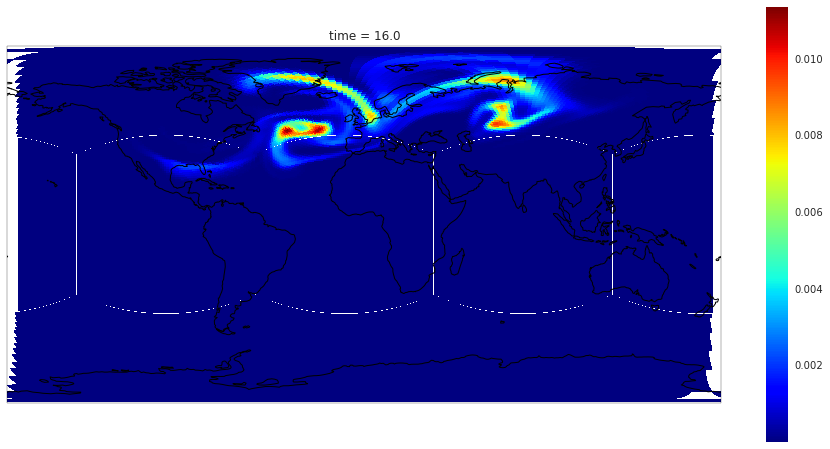

In [12]:
plt.figure(figsize=(16,8))
ds["plume01"].isel(time=7).mean(dim="pfull").cs.plot_CSlayer()

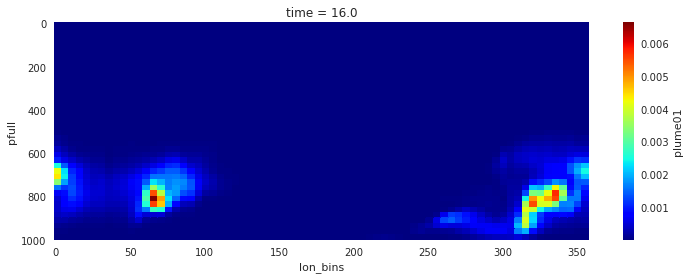

In [13]:
plt.figure(figsize=(12,4))
ds["plume01"].isel(time=7).cs.meridional_mean().plot(cmap="jet",yincrease=False)

In [6]:
def extract_max(logfile,varname,step=48):
    with open(logfile,"r") as fi:
        tempdata = []
        for ln in fi:
            if ln.startswith(" "+varname):
                # notice the white space at the beginning of the line
                tempdata.append(ln.split()[3])
    return np.array(tempdata)[::step]

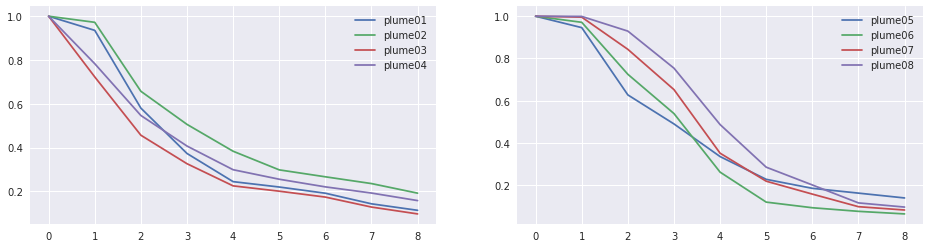

In [29]:
logfile="/u/jzhuang1/FV3/rundirs/C48/C48L80_std.log"

varnames = ["plume0{0}".format(i) for i in range(1,9)]

plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
for varname in varnames[0:4]:
    maxVMR = extract_max(logfile,varname)
    plt.plot(maxVMR,label=varname)
plt.legend()

plt.subplot(1,2,2)
for varname in varnames[4:8]:
    maxVMR = extract_max(logfile,varname)
    plt.plot(maxVMR,label=varname)
plt.legend()